In [119]:
from brian2 import *
%matplotlib inline

In [120]:
# Constants
tau = 20*ms
I = 1.1/ms
gamma = 1/ms

# Non-dimensionalized constants
tp = tau/ms
curr = I*ms
g = gamma*ms
out = curr/g  #should be > the threshold of firing

# equation (1)
eqs = '''
dv/dt = I - gamma*v : 1
'''

# equation (2) 
eqs2 = '''
dv/dt = ((I/gamma) - v)/tau : 1
'''

In [132]:
start_scope()

n = 90

seed(10)

G1 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
G2 = NeuronGroup(n/3, eqs2, threshold='v>1', reset='v = 0', method='exact')

group1init = randint(0, 10, size=n)/10
group2init = randint(0, 10, size=n//3)/10

G1.v = group1init
G2.v = group2init

(array([11., 10.,  8.,  6.,  8.,  5., 11.,  5., 14., 12.]),
 array([0.  , 0.09, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.72, 0.81, 0.9 ]),
 <BarContainer object of 10 artists>)

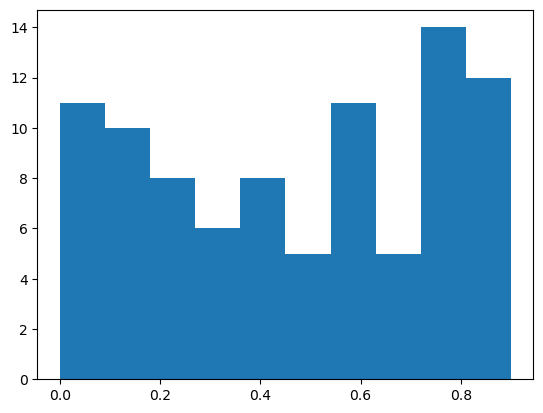

In [137]:
hist(group1init, 10)

In [123]:
matrix = zeros((n, n))

def matcon(i,j):
        matrix[i, j] = 1

# each group of 30 to everything else
for i in range(30):
        for j in range(30, 90):
                matcon(i,j)
for i in range(30,60):
        for j in range(60, 90):
                matcon(i,j)
        for j in range(0, 30):
                matcon(i,j)
for i in range(60,90):
        for j in range(0, 60):
                matcon(i,j)

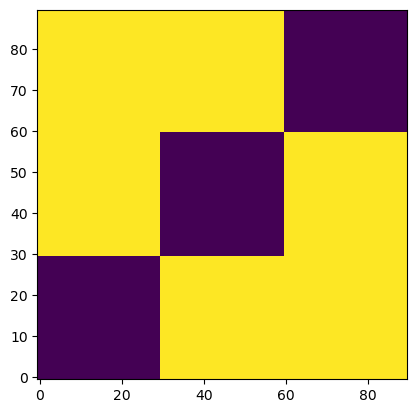

In [124]:
imshow(matrix, origin='lower');

In [125]:
inh = 0.01
exc = 0.01

p = 0.6
exc_matrix = choice(2, (30, 90), p=[1-p, p])

si, ti = matrix.nonzero()
se, te = exc_matrix.nonzero()

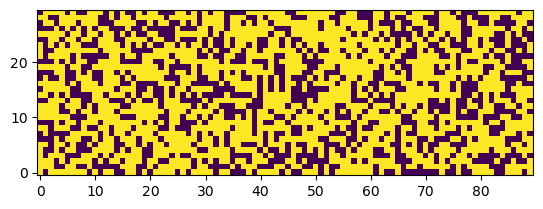

In [126]:
imshow(exc_matrix, origin='lower');

In [127]:
I1 = Synapses(G1, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')

# Excitatory synapses
E1 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')

I1.connect(i=si, j=ti)

E1.connect(i=se, j=te)

M1 = StateMonitor(G1, 'v', record=True)
Sp1 = SpikeMonitor(G1)

In [128]:
run(1000*ms)

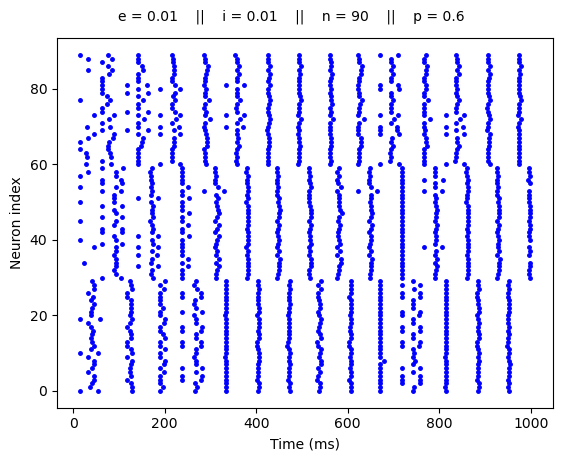

In [129]:
plot(Sp1.t/ms, Sp1.i, '.b', markersize=5)
xlabel('Time (ms)')
ylabel('Neuron index')
text(98, 98, 'e = {}    ||    i = {}    ||    n = {}    ||    p = {}'.format(exc, inh, n, p))
show()